In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math

# Data exploration

In [38]:
with open('datasets/df_vol_combined.pkl', 'rb') as f:
    df_vol_combined = pickle.load(f)

with open('datasets/df_vol_season_melt.pkl', 'rb') as f:
    df_vol_season_melt = pickle.load(f)

with open('datasets/df_seasonal_speed.pkl', 'rb') as f:
    df_seasonal_speed = pickle.load(f)

In [39]:
df_vol_season_melt

,Season,Roadway Name,From,To,Hour,Volume
0,Winter,126 STREET,37 AVENUE,38 AVENUE,0,23.0
1,Winter,126 STREET,37 AVENUE,38 AVENUE,0,24.0
2,Winter,126 STREET,37 AVENUE,38 AVENUE,0,20.0
3,Winter,126 STREET,37 AVENUE,38 AVENUE,0,17.0
4,Winter,126 STREET,37 AVENUE,38 AVENUE,0,30.0
...,...,...,...,...,...,...
5851,Autumn,WOODROW ROAD,Everton Avenue,Delmar Avenue,23,27.0
5852,Autumn,WOODROW ROAD,Everton Avenue,Delmar Avenue,23,26.0
5853,Autumn,WOODROW ROAD,Everton Avenue,Delmar Avenue,23,38.0
5854,Autumn,WOODROW ROAD,Everton Avenue,Delmar Avenue,23,65.0


In [40]:
df_vol_combined

,ID,SegmentID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Month,Season
0,3345,84009,126 STREET,37 AVENUE,38 AVENUE,NB,01/30/2012,23,19,14,...,256.0,264.0,174.0,91.0,74.0,50.0,44.0,23.0,1,Winter
1,3346,84009,126 STREET,37 AVENUE,38 AVENUE,NB,01/31/2012,24,15,10,...,262.0,245.0,176.0,111.0,75.0,62.0,56.0,12.0,1,Winter
2,3347,84009,126 STREET,37 AVENUE,38 AVENUE,NB,02/01/2012,20,9,10,...,259.0,217.0,172.0,138.0,59.0,76.0,41.0,16.0,2,Winter
3,3348,84009,126 STREET,37 AVENUE,38 AVENUE,NB,02/02/2012,17,11,10,...,314.0,227.0,156.0,100.0,73.0,61.0,31.0,23.0,2,Winter
4,3349,84009,126 STREET,37 AVENUE,38 AVENUE,NB,02/03/2012,30,14,9,...,317.0,325.0,184.0,111.0,72.0,69.0,52.0,42.0,2,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,366,2760,WOODROW ROAD,Everton Avenue,Delmar Avenue,WB,11/18/2020,13,11,7,...,230.0,229.0,177.0,167.0,108.0,62.0,45.0,27.0,11,Autumn
240,366,2760,WOODROW ROAD,Everton Avenue,Delmar Avenue,WB,11/19/2020,22,9,6,...,268.0,226.0,196.0,173.0,87.0,66.0,43.0,26.0,11,Autumn
241,366,2760,WOODROW ROAD,Everton Avenue,Delmar Avenue,WB,11/20/2020,24,12,9,...,255.0,291.0,245.0,170.0,109.0,90.0,75.0,38.0,11,Autumn
242,366,2760,WOODROW ROAD,Everton Avenue,Delmar Avenue,WB,11/21/2020,32,26,13,...,225.0,176.0,171.0,155.0,86.0,92.0,61.0,65.0,11,Autumn


## VOL VISUALIZATIONS

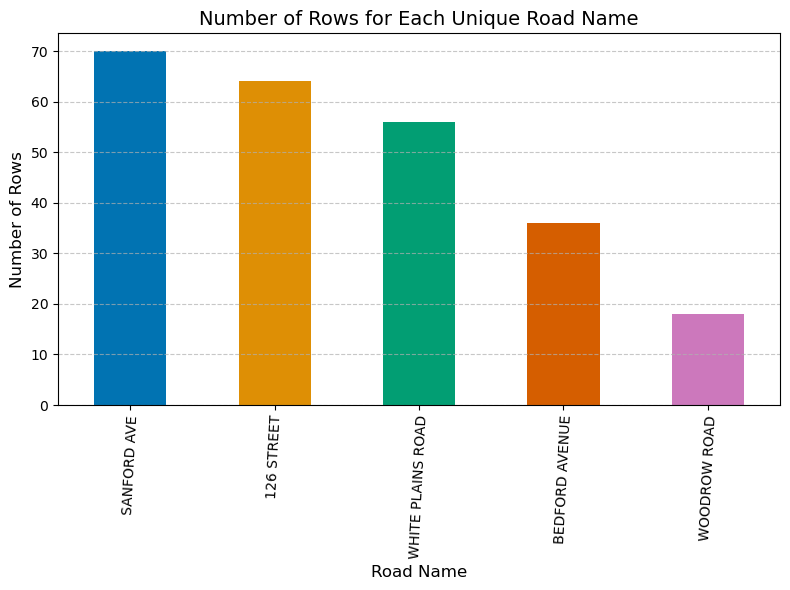

In [41]:
# Count the number of rows for each unique road name
def plot_num_rows(df):
    # Count the number of rows for each unique road name
    road_name_counts = df['Roadway Name'].value_counts()

    # Create a color palette for the unique road names
    colors = sns.color_palette("colorblind", len(road_name_counts))
    
    # Create a mapping of road names to colors
    color_mapping = {road_name: colors[i] for i, road_name in enumerate(road_name_counts.index)}

    # Plot the count of rows for each unique road name
    plt.figure(figsize=(8, 6))
    road_name_counts.plot(kind='bar', color=[color_mapping[road_name] for road_name in road_name_counts.index])

    # Customizing the plot
    plt.title('Number of Rows for Each Unique Road Name', fontsize=14)
    plt.xlabel('Road Name', fontsize=12)
    plt.ylabel('Number of Rows', fontsize=12)
    plt.xticks(rotation=87)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
plot_num_rows(df_vol_combined)

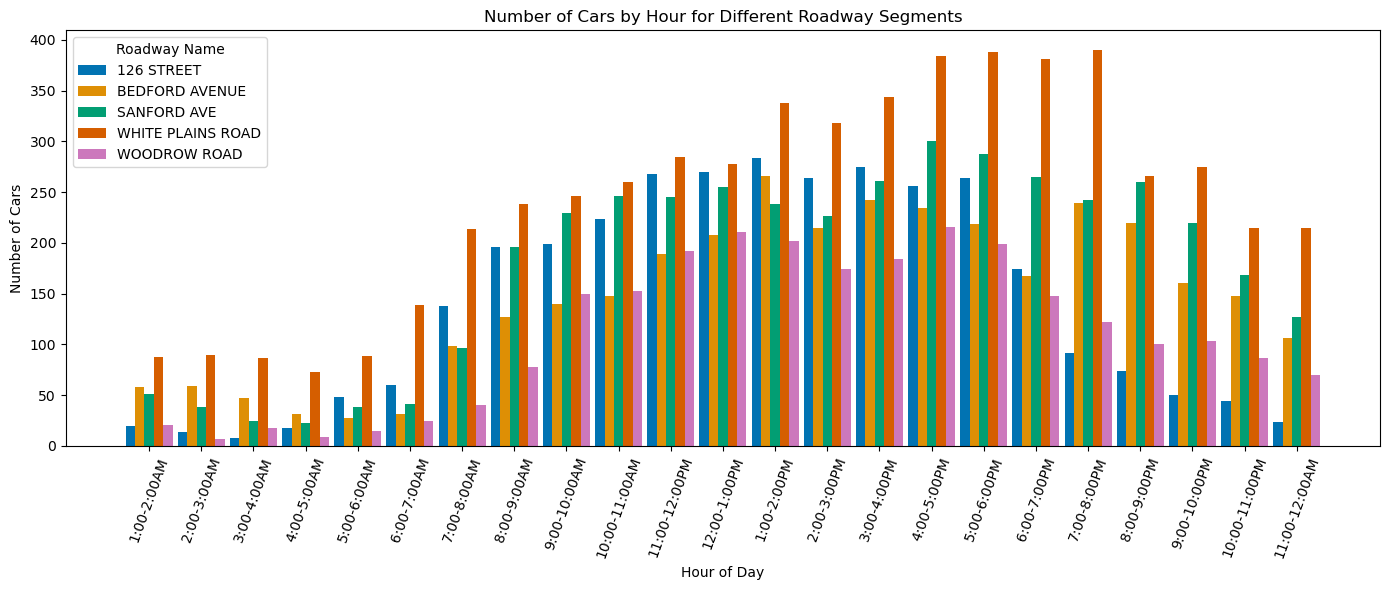

In [42]:
def plot_grouped_mean_cars(df):
    df = df_vol_combined.melt(id_vars=['Roadway Name', 'Date'], 
                        value_vars=df_vol_combined.columns[8:-2],
                        var_name='Hour',
                        value_name='Cars')

    plt.figure(figsize=(14, 6))

    # Create a bar for each roadway name in separate columns
    roadway_names = df['Roadway Name'].unique()
    hour_labels = df['Hour'].unique()  # Unique hour labels
    x = np.arange(len(hour_labels))  # x locations for each hour
    bar_width = 0.18  # Width of the bars
    colors = sns.color_palette("colorblind", 5)



    # Create a dictionary to hold car counts for each roadway and hour
    car_counts = {roadway: np.zeros(len(hour_labels)) for roadway in roadway_names}

    # Populate the car_counts dictionary
    for roadway in roadway_names:
        group = df[df['Roadway Name'] == roadway]
        for idx, hour in enumerate(hour_labels):
            car_counts[roadway][idx] = group[group['Hour'] == hour]['Cars'].values[0] if not group[group['Hour'] == hour].empty else 0

    # Create bars for each roadway
    for i, roadway in enumerate(roadway_names):
        plt.bar(x + i * bar_width, car_counts[roadway], width=bar_width, color=colors[i], label=roadway, alpha=1)

    # Customizing the x-ticks
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Cars')
    plt.title('Number of Cars by Hour for Different Roadway Segments-')
    plt.xticks(x + bar_width * (len(roadway_names) - 1) / 2, hour_labels, rotation=70)  # Center the hour labels
    plt.legend(title='Roadway Name')
    plt.tight_layout()
    plt.show()
plot_grouped_mean_cars(df_vol_combined)

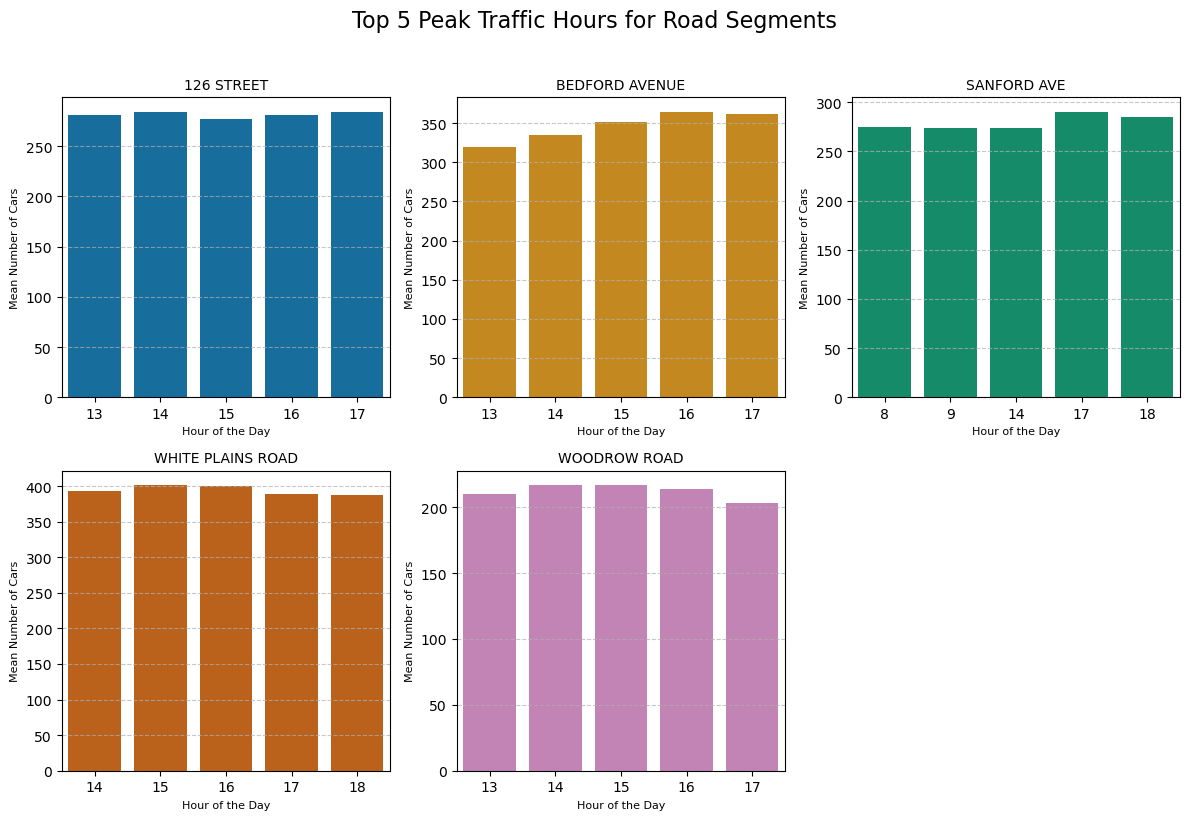

In [43]:
def plot_peak_hours_2x2(df, top_n=5):
    """
    Function to calculate and plot the peak hours for each unique road segment in a 2x2 subplot arrangement.
    
    Parameters:
    df (DataFrame): The DataFrame containing the volume data
    top_n (int): Number of top peak hours to display (default is 5)
    """
    unique_road_segments = df['Roadway Name'].unique()
    num_segments = len(unique_road_segments)
    plots_per_page = 6  # We will show 4 plots (2x2) on each page

    # Create a color palette for the unique road segments
    colors = sns.color_palette("colorblind", 5)
    color_mapping = {road_segment: colors[i] for i, road_segment in enumerate(unique_road_segments)}

    # Calculate the number of pages required
    num_pages = math.ceil(num_segments / plots_per_page)

    for page in range(num_pages):
        # Define subplots: 2 rows and 3 columns (total 6 plots)
        fig, axes = plt.subplots(2, 3, figsize=(12, 8))
        axes = axes.flatten()

        # Iterate through road segments for this page
        start_index = page * plots_per_page
        end_index = min(start_index + plots_per_page, num_segments)

        for i, road_segment_name in enumerate(unique_road_segments[start_index:end_index]):
            # Filter data for the specific road segment
            df_segment = df[df['Roadway Name'] == road_segment_name]
            
            # Group by 'Hour' and calculate the mean volume for each hour
            mean_cars_per_hour = df_segment.groupby('Hour')['Volume'].mean().sort_values(ascending=False).head(top_n)

            # Plot the mean number of cars for the top peak hours using the mapped color
            sns.barplot(x=mean_cars_per_hour.index, y=mean_cars_per_hour.values, ax=axes[i], color=color_mapping[road_segment_name])
            axes[i].set_title(f'{road_segment_name}', fontsize=10)
            axes[i].set_xlabel('Hour of the Day', fontsize=8)
            axes[i].set_ylabel('Mean Number of Cars', fontsize=8)
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)

        # Hide unused subplots in the grid if there are fewer than 6 road segments on the last page
        for j in range(end_index - start_index, plots_per_page):
            fig.delaxes(axes[j])

        fig.suptitle(f'Top {top_n} Peak Traffic Hours for Road Segments', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()
plot_peak_hours_2x2(df_vol_season_melt, top_n=5)


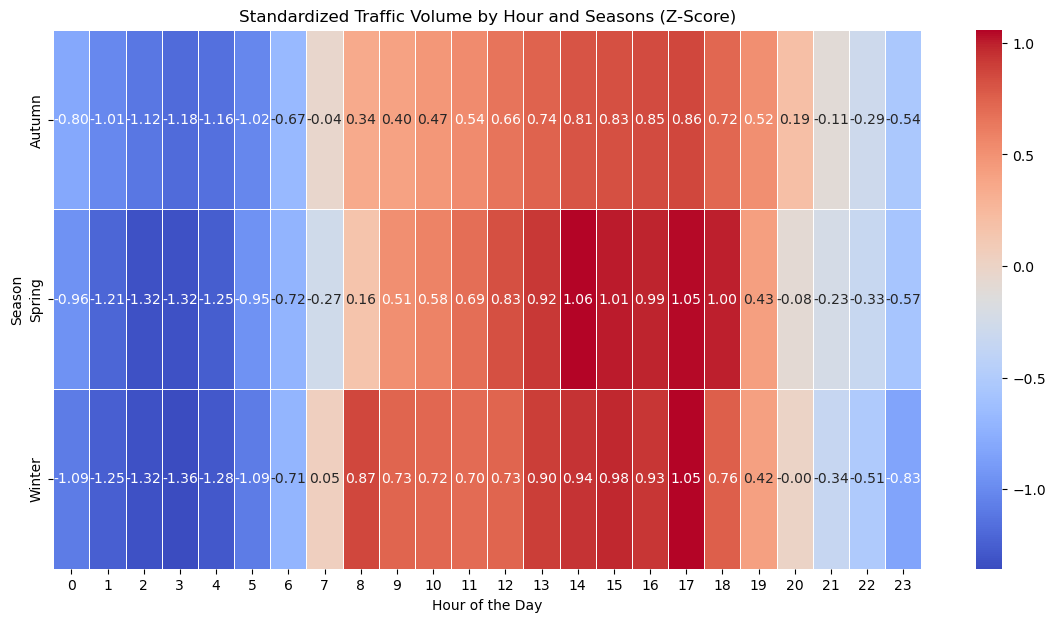

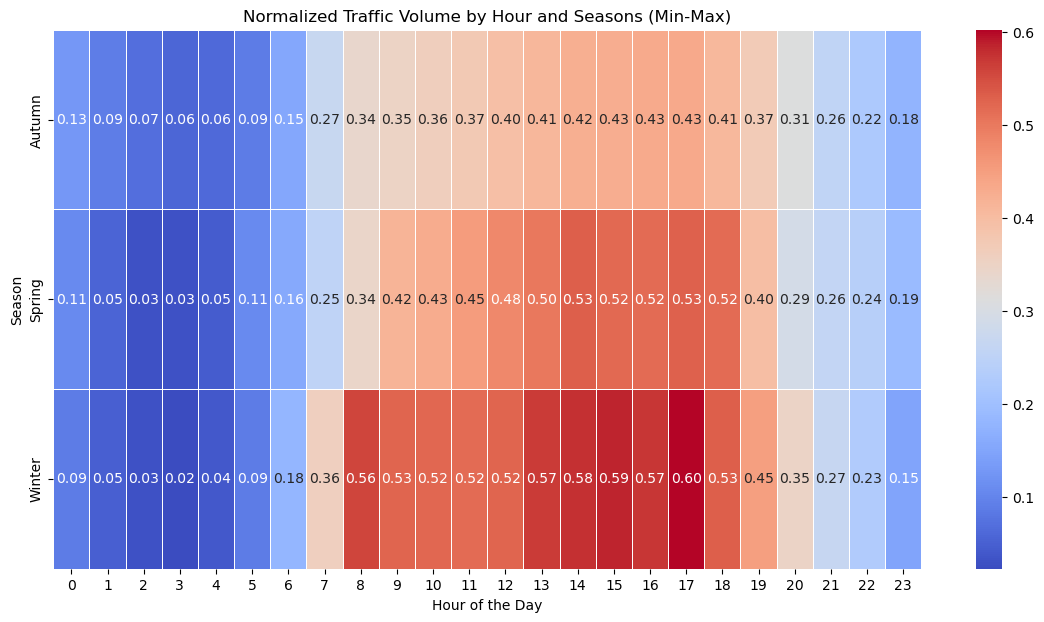

In [49]:
# Function to apply standard scaling or min-max normalization
def transform_volume(data, method='standardize'):
    """Apply standardization or normalization to the 'Volume' column within groups."""
    if method == 'standardize':
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
    
    data['Volume'] = scaler.fit_transform(data[['Volume']])
    return data

# Apply transformations
df_standardized = df_vol_season_melt.groupby('Season').apply(transform_volume, method='standardize')
df_normalized = df_vol_season_melt.groupby('Season').apply(transform_volume, method='normalize')

# Function to prepare data for heatmap
def prepare_heatmap_data(df):
    """Group by 'Season' and 'Hour' and pivot for heatmap preparation."""
    grouped = df.groupby(['Season', 'Hour'])['Volume'].mean().reset_index()
    return grouped.pivot(index='Season', columns='Hour', values='Volume')

# Prepare data
heatmap_data_standardized = prepare_heatmap_data(df_standardized)
heatmap_data_normalized = prepare_heatmap_data(df_normalized)

# Visualization
def plot_heatmap(data, title, figsize=(14, 7)):
    plt.figure(figsize=figsize)
    sns.heatmap(data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(title)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Season')
    plt.show()

# Create heatmaps
plot_heatmap(heatmap_data_standardized, 'Standardized Traffic Volume by Hour and Seasons (Z-Score)')
plot_heatmap(heatmap_data_normalized, 'Normalized Traffic Volume by Hour and Seasons (Min-Max)')

Note to heatmap: this heatmap are based on the data that is present in the for the differnet roadway segments, meaning some data is lacking. Summer data is missing completly and some of them miss spring data. This is therefore normalized and standerdized, this to see patterns. not a valid representation of number of cars directly. This however shows the more cars in the middle of the day. interestningly comparing this to the speed dataset we can also se that this is relevant to traffic, since the general speed is a lot lower in the hours of day

## SPEED VISUALIZATIONS

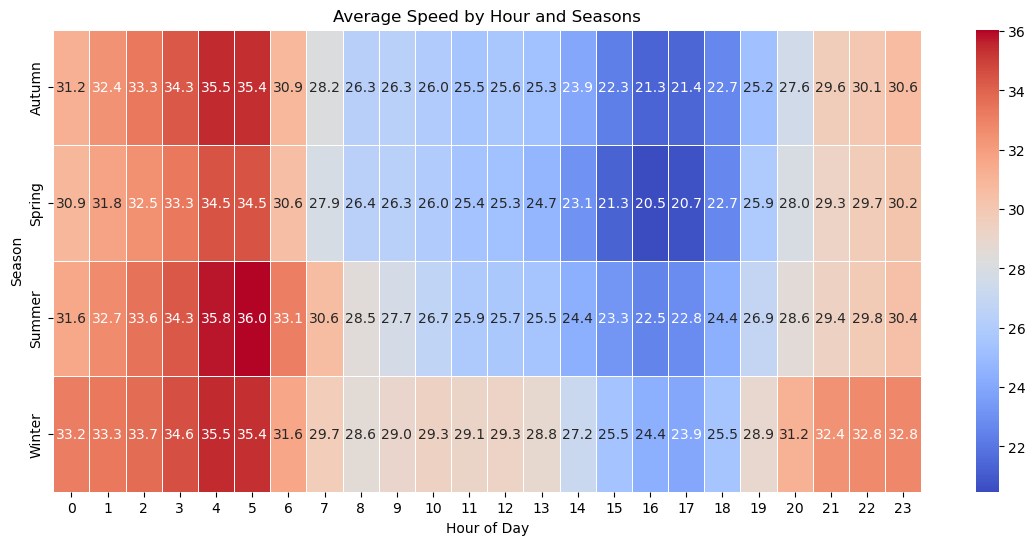

<Figure size 1000x600 with 0 Axes>

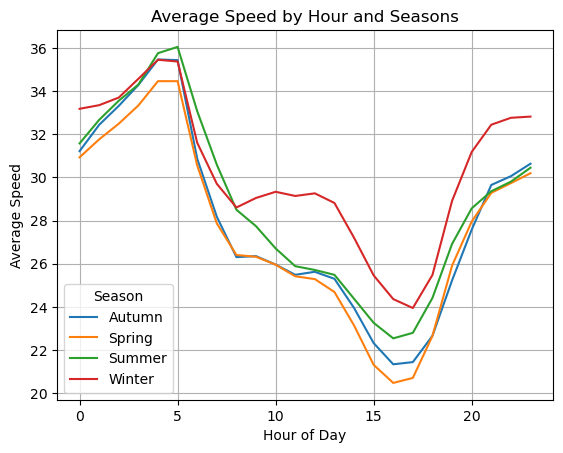

In [51]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_seasonal_speed, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)  # Add linewidths parameter
plt.title('Average Speed by Hour and Seasons')
plt.xlabel('Hour of Day')
plt.ylabel('Season')
plt.show()

# Plot the average speed for each season over time (hours)
plt.figure(figsize=(10, 6))
df_seasonal_speed.T.plot(kind='line')
plt.title('Average Speed by Hour and Seasons')
plt.xlabel('Hour of Day')
plt.ylabel('Average Speed')
plt.grid(True)
plt.legend(title='Season')
plt.show()

NOT normalized, caus that would make no sense